# TFM.

# Agrupar complejos de acuerdo a sus descriptores con K-means

### Secciones

- Algoritmo K-means

In [1]:
import pyodbc

server = 'XXX' 
database = 'bioe' 
username = 'bioe' 
password = 'XXX' 
trusted = 'yes;' 

cnxn = pyodbc.connect('Driver={SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=no;'+username+';PWD='+ password)
cursor = cnxn.cursor()

import pandas as pd


#### Algoritmo K-means

C:\Users\coept\AppData\Local\Temp\ipykernel_16912\2386006247.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)
C:\Users\coept\AppData\Local\Temp\ipykernel_16912\2386006247.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(["dG_S"],1).hist()


      Complex  benchmark  dG_S  CP_BFKV  CP_BL  CP_BT  CP_GKS  CP_HLPL  \
0   1A2K_C:AB          1     1  -0.8654 -6.506  -5.48    -8.0    -28.6   
1    1ACB_E:I          1     1  -2.3756 -6.130  -7.74    -2.4    -34.0   
2   1AHW_AB:C          1     1  -1.0114 -8.650  -4.96   -14.0    -34.2   
3    1AK4_A:D          1     0   1.1344 -2.076  -3.98    -4.0    -12.0   
4  1AKJ_AB:DE          1     0   1.5450 -4.558   2.74   -10.0    -26.8   

   CP_MJPL  CP_MJ3h  ...  AP_PISA  FIREDOCK  FIREDOCK_AB  FIREDOCK_EI  \
0   -140.8    -2.96  ...  -0.2445    -58.02       -71.00       -25.76   
1   -178.0   -11.50  ...  -0.4878    -88.88       -96.94       -62.16   
2   -196.2     2.36  ...  -0.0288    -36.54       -67.22        -3.33   
3   -122.4    -2.90  ...  -0.2250    -42.73       -47.67       -29.09   
4   -191.2     4.64  ...  -0.2936    -45.19       -67.13        -4.81   

     CP_PIE   CP_DDG_U   CP_DDG_W   AP_DDG_U   AP_DDG_W      DDG_V  
0  1.138510  -4.560318  -3.938181  -2.889758 -1

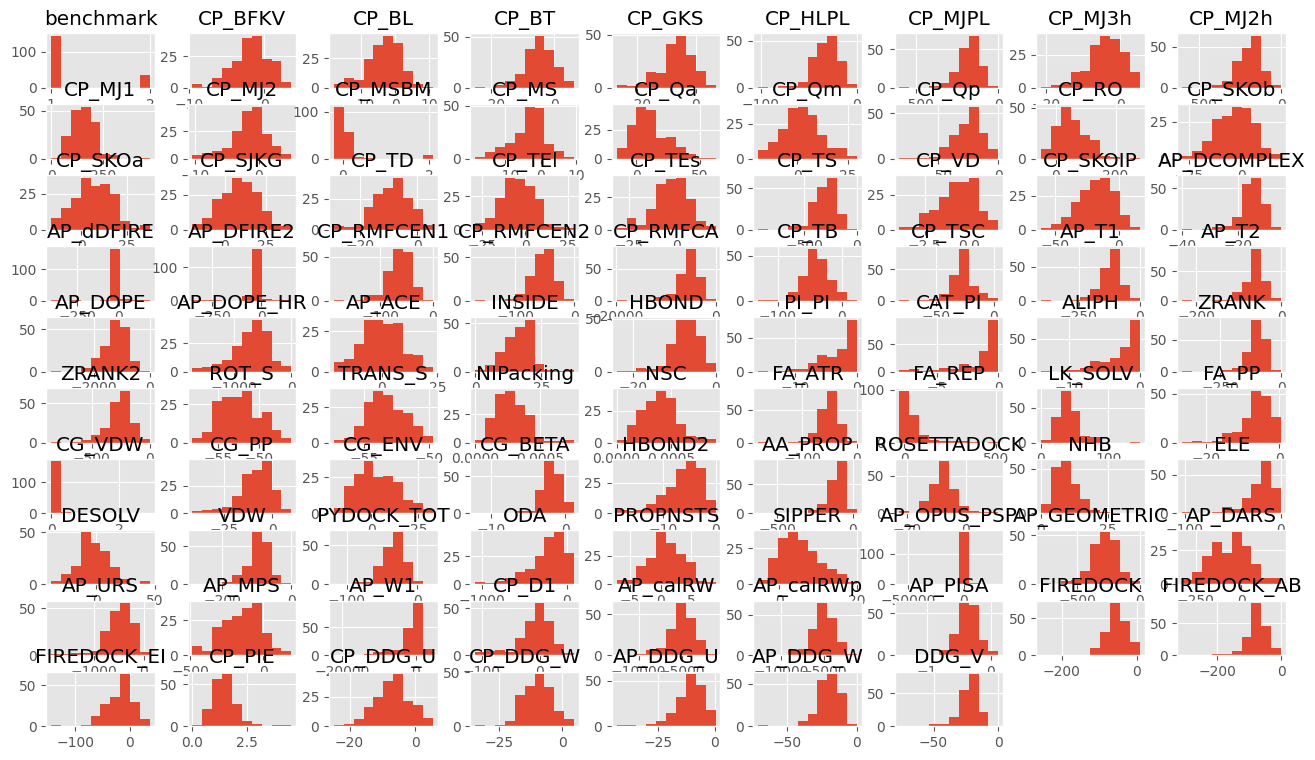

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

query = "SELECT * FROM [bioe].[TFM].[tfm_NNaN0_S] ();"

df = pd.read_sql_query(query, cnxn)
print(df.head(5))
#print(df.loc[0,:])
#print(df[["CP_BFKV","CP_BL"]])


dG_S
0     53
1    125
dtype: int64


C:\Users\coept\AppData\Local\Temp\ipykernel_16912\1060010521.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(["dG_S"],1).hist()


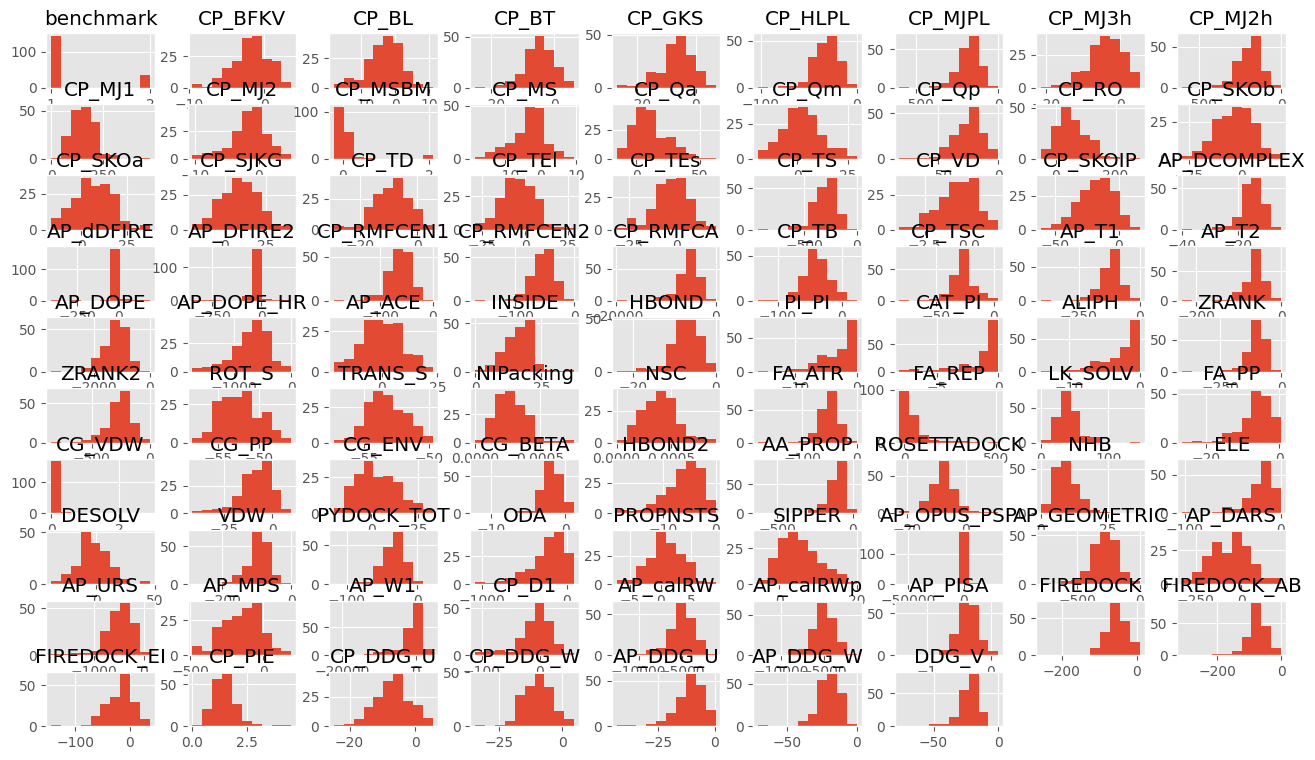

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


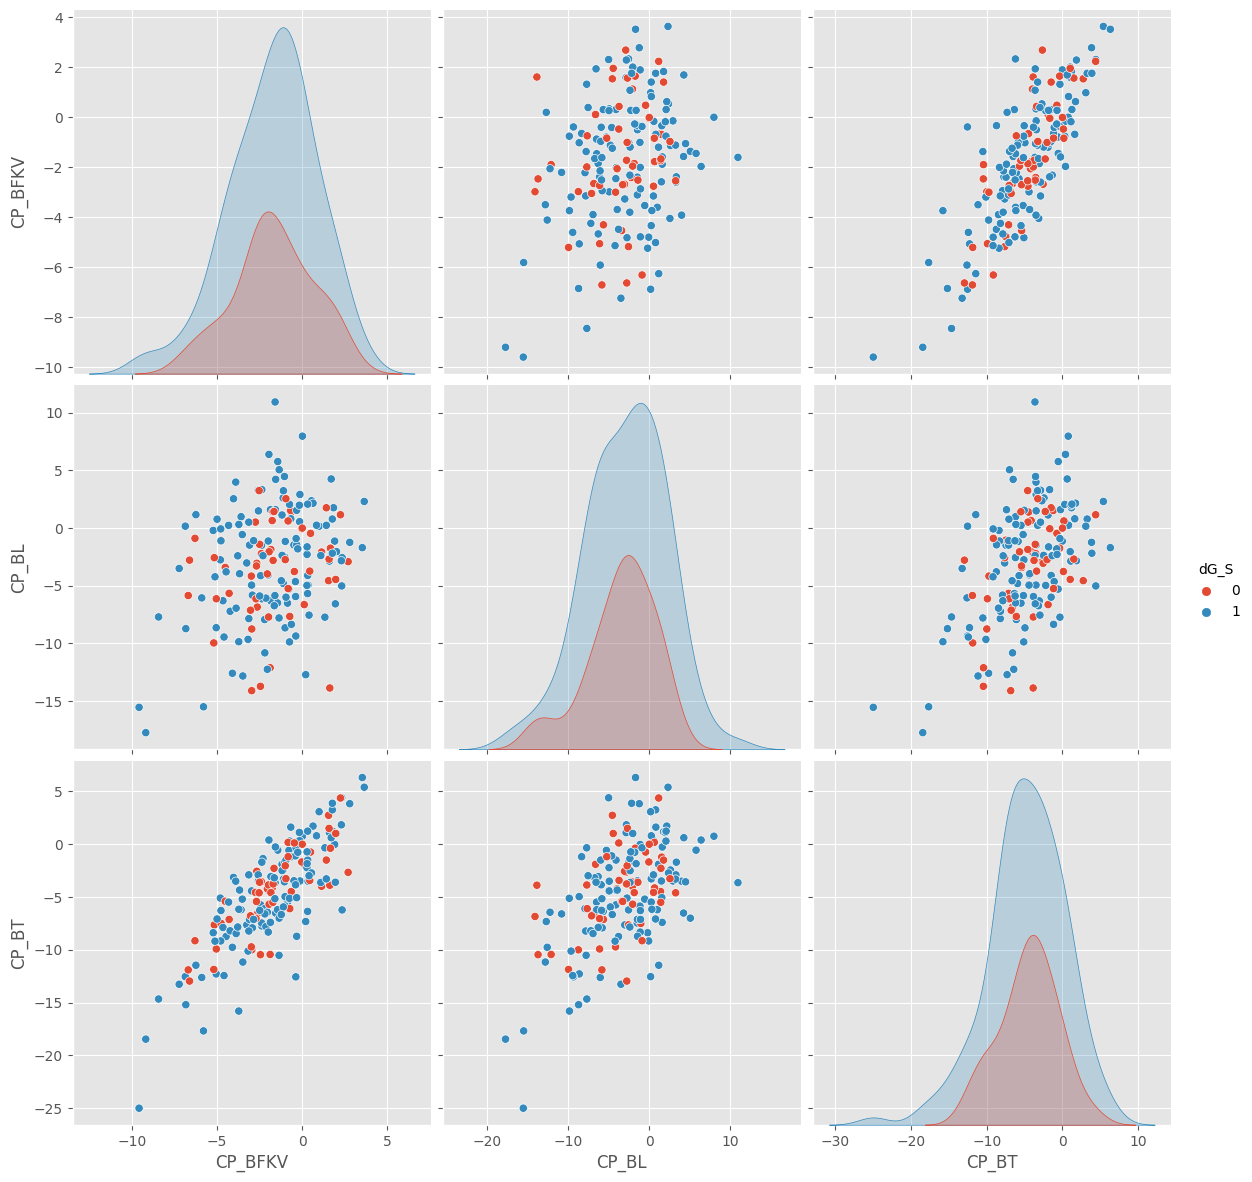

In [7]:
df.describe()
print(df.groupby("dG_S").size())

df.drop(["dG_S"],1).hist()
plt.show()

sb.pairplot(df.dropna(), hue="dG_S",size=4,vars=["CP_BFKV","CP_BL","CP_BT"],kind='scatter')


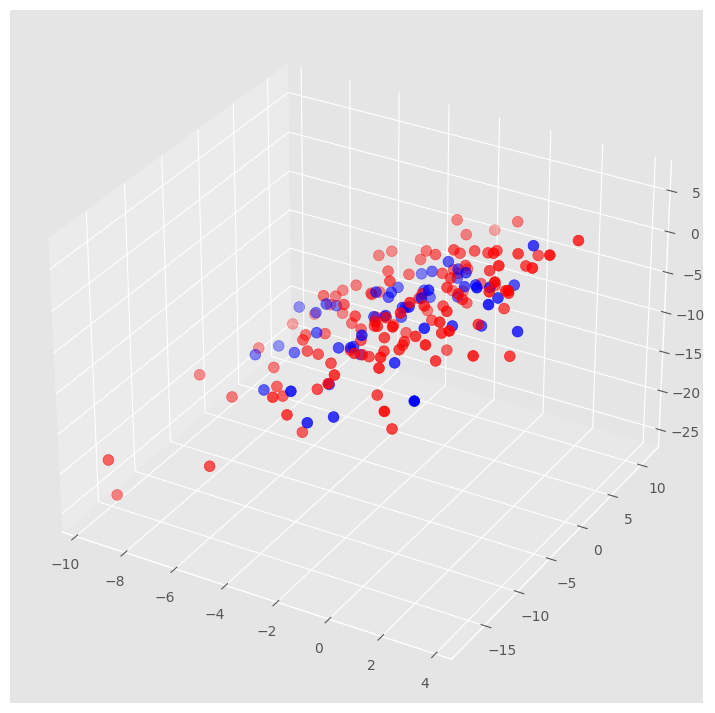

In [21]:
X = np.array(df[["CP_BFKV","CP_BL","CP_BT"]])
y = np.array(df["dG_S"])
X.shape

%matplotlib inline

fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
colores=['blue','red']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


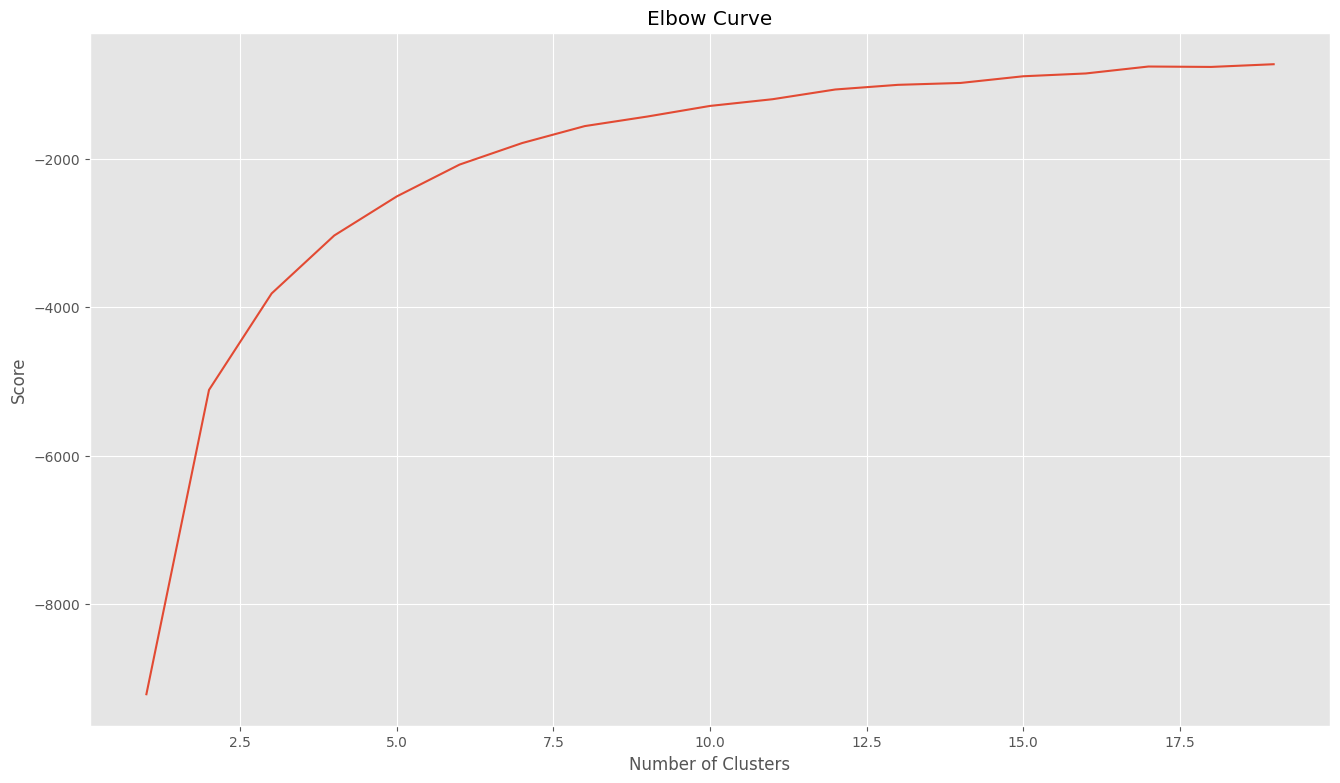

In [15]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [16]:
K=5 # por interpretación del gráfico anterior

kmeans = KMeans(n_clusters=K).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ -1.29488125   3.0164375   -2.8375    ]
 [ -3.85134595  -1.69405405  -7.42972973]
 [ -1.57571628  -7.06576744  -5.65767442]
 [ -4.97218889 -10.77677778 -13.46666667]
 [  0.66438333  -1.79570833   0.23791667]]


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


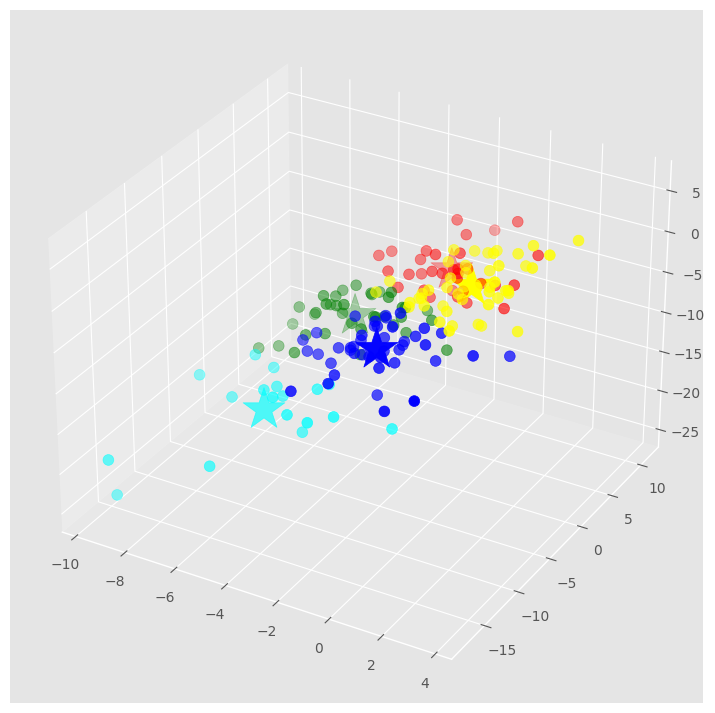

In [25]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

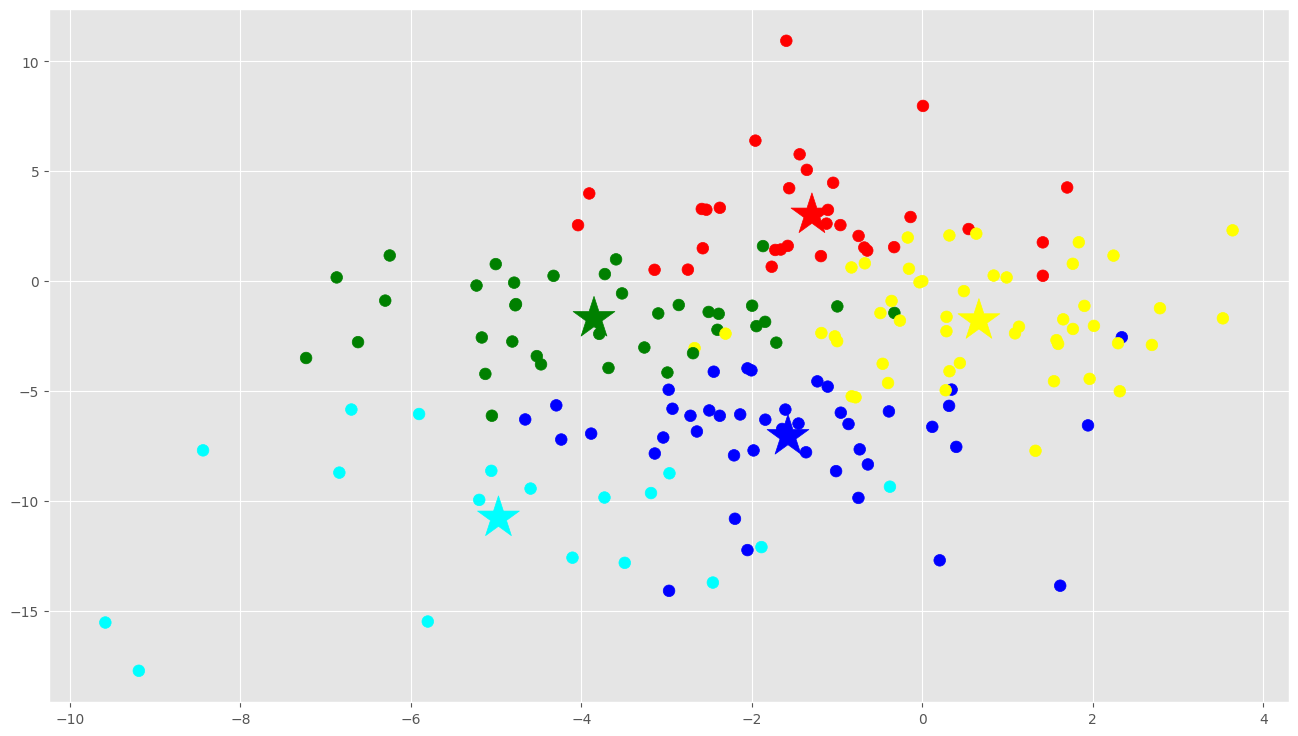

In [26]:
# Getting the values and plotting it
f1 = df["CP_BFKV"].values
f2 = df["CP_BL"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

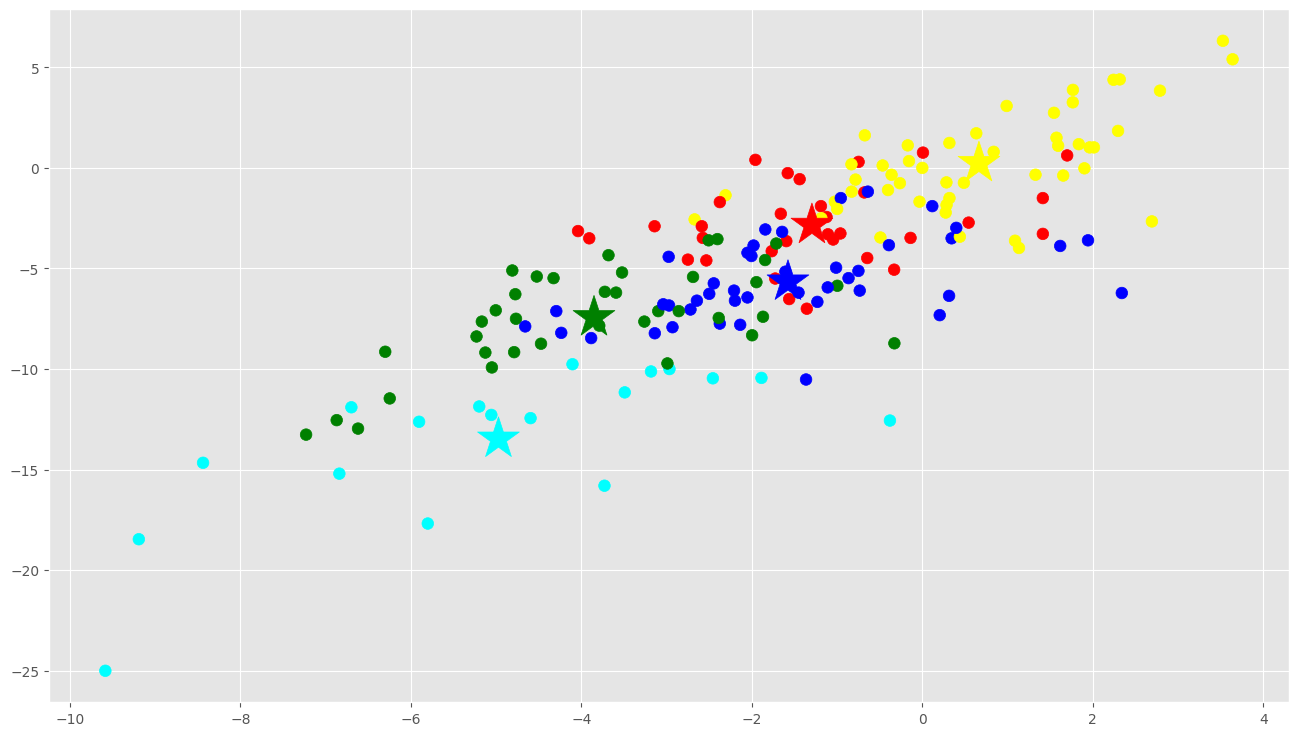

In [28]:
# Getting the values and plotting it
f1 = df["CP_BFKV"].values
f2 = df["CP_BT"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()


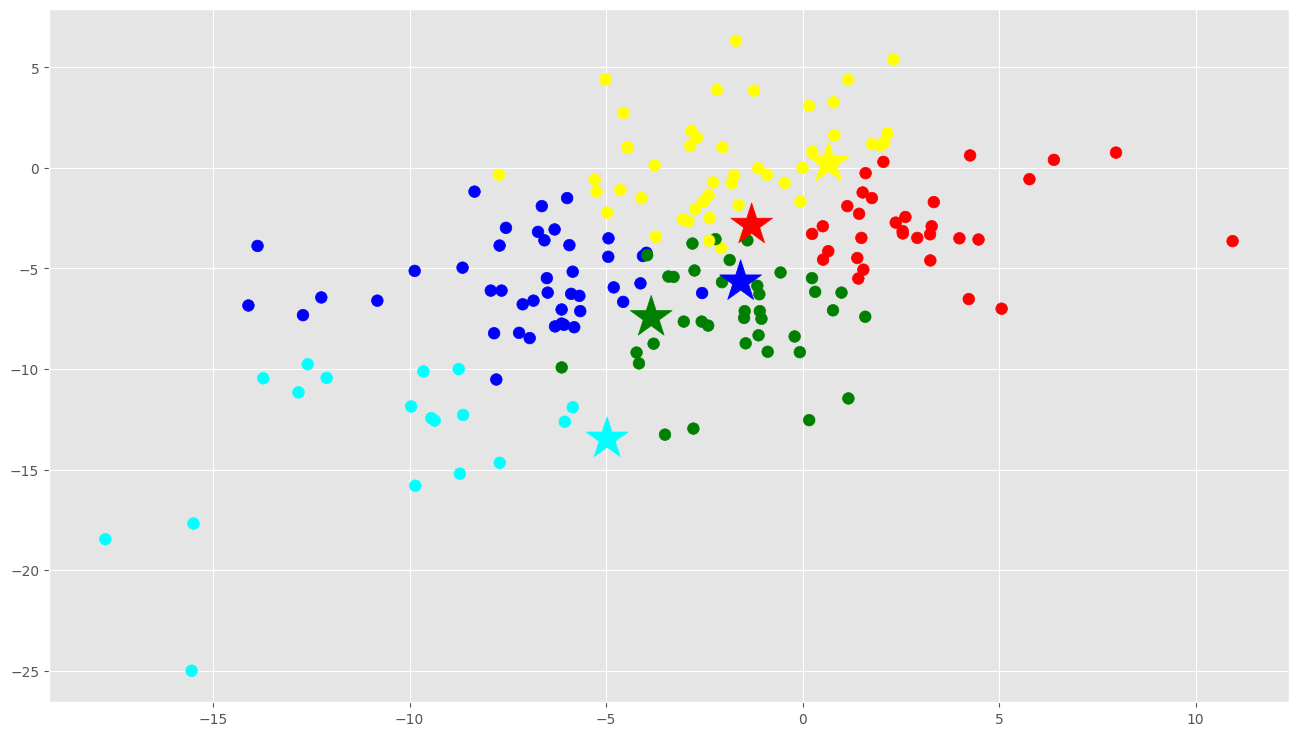

In [29]:
# Getting the values and plotting it
f1 = df["CP_BL"].values
f2 = df["CP_BT"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [30]:
X_new = np.array([[-0.8654, -6.506, -5.48]]) #complejo 1A2K_C:AB

new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
